# Importation librairies

## Pycaret

In [ ]:
pip install -U pycaret scikit-learn

## Librairies

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio

## Tables

In [5]:
df_train_men = pd.read_excel("df_train_men.xlsx")
df_train_women = pd.read_excel("df_train_women.xlsx")
df_predict_men = pd.read_excel("df_predict_men.xlsx")
df_predict_men = pd.read_excel("df_predict_men.xlsx")

In [308]:
df_train_men_full = pd.read_excel("df_train_men_full.xlsx")

In [309]:
df_predict_men_full = pd.read_excel("df_predict_men_full.xlsx")

In [280]:
df_fighter = pd.read_excel("fighters_clean.xlsx")

In [281]:
df_fighter= df_fighter[['fighter_id','name']]

# PREPARATION DES DATAFRAME

## Ajout du win ratio

In [310]:
df_train_m = pd.concat([df_train_men_full, df_predict_men_full], ignore_index=True)

In [ ]:
df_train_m.info()

In [312]:
#Calcul des win pour win_rate
# nombre de wins et de combats à la date du combat
df_train_m = df_train_m.sort_values(by='date')
df_train_m['fights_won'] = df_train_m.groupby('fighter')['win'].cumsum()
df_train_m['fight_count'] = df_train_m.groupby('fighter').cumcount() + 1

# Pour la colonne fight_count :avoir seulement la dernière valeur pour les dates sup ou égales au 1-06-2024

def fill_last_fight_count(df):
    max_date = '2024-06-01'
    last_value = df.loc[df['date'] <= max_date, 'fight_count'].iloc[-1] if not df[df['date'] <= max_date].empty else 0
    df.loc[df['date'] > max_date, 'fight_count'] = last_value
    return df
df_train_m = df_train_m.groupby('fighter').apply(fill_last_fight_count).reset_index(drop=True)

#calcul du win ratio
def calculate_win_ratio(row):
    if row['fight_count'] == 0:
        return 0
    else:
        return row['fights_won'] / row['fight_count']

# Appliquer la fonction à chaque ligne
df_train_m['win_ratio'] = df_train_m.apply(calculate_win_ratio, axis=1)

#concat_df['fights_won'] = concat_df['fights_won'] /
# concat_df[['date', 'fighter', 'fight_count', 'win', 'fights_won']]
df_train_m[['date','fighter', 'fight_count', 'win',
           'fights_won', 'win_ratio']].loc[df_train_m['fighter'] == 'Curtis Blaydes']

,date,fighter,fight_count,win,fights_won,win_ratio
2849,2016-04-10,Curtis Blaydes,1,0,0,0.000000
2850,2016-10-01,Curtis Blaydes,2,1,1,0.500000
2851,2017-02-04,Curtis Blaydes,3,0,1,0.333333
2852,2017-07-08,Curtis Blaydes,4,1,2,0.500000
2853,2017-11-04,Curtis Blaydes,5,1,3,0.600000
2854,2018-02-10,Curtis Blaydes,6,1,4,0.666667
2855,2018-06-09,Curtis Blaydes,7,1,5,0.714286
2856,2018-11-24,Curtis Blaydes,8,0,5,0.625000
2857,2019-03-23,Curtis Blaydes,9,1,6,0.666667
2858,2019-09-07,Curtis Blaydes,10,1,7,0.700000


## Calcul du lose ratio

In [313]:
#Calcul des lose pour lose_rate
# nombre de wins et de combats à la date du combat
# df_train_m = df_train_m.sort_values(by='date')
df_train_m['fights_lose'] = df_train_m.groupby('fighter')['win'].transform(lambda x: (x == 0).cumsum())

# Pour la colonne fight_count :avoir seulement la dernière valeur pour les dates sup ou égales au 1-06-2024

def fill_last_fight_lose(df):
    max_date = '2024-06-01'
    last_value = df.loc[df['date'] <= max_date, 'fights_lose'].iloc[-1] if not df[df['date'] <= max_date].empty else 0
    df.loc[df['date'] > max_date, 'fights_lose'] = last_value
    return df
df_train_m = df_train_m.groupby('fighter').apply(fill_last_fight_lose).reset_index(drop=True)


#calcul du lose ratio
def calculate_lose_ratio(row):
    if row['fight_count'] == 0:
        return 0
    else:
        return row['fights_lose'] / row['fight_count']

# Appliquer la fonction à chaque ligne
df_train_m['lose_ratio'] = df_train_m.apply(calculate_lose_ratio, axis=1)

#concat_df['fights_lose'] = concat_df['fights_lose'] /
# concat_df[['date', 'fighter', 'fight_count', 'win', 'fights_won']]
df_train_m[['date','fighter', 'fight_count', 'win',
           'fights_lose', 'lose_ratio']].loc[df_train_m['fighter'] == 'Curtis Blaydes']

,date,fighter,fight_count,win,fights_lose,lose_ratio
2849,2016-04-10,Curtis Blaydes,1,0,1,1.000000
2850,2016-10-01,Curtis Blaydes,2,1,1,0.500000
2851,2017-02-04,Curtis Blaydes,3,0,2,0.666667
2852,2017-07-08,Curtis Blaydes,4,1,2,0.500000
2853,2017-11-04,Curtis Blaydes,5,1,2,0.400000
2854,2018-02-10,Curtis Blaydes,6,1,2,0.333333
2855,2018-06-09,Curtis Blaydes,7,1,2,0.285714
2856,2018-11-24,Curtis Blaydes,8,0,3,0.375000
2857,2019-03-23,Curtis Blaydes,9,1,3,0.333333
2858,2019-09-07,Curtis Blaydes,10,1,3,0.300000


# Ajout de la table avec l'allonge recalculé

In [287]:
df_train_allonge = pd.read_excel("df_train_allonge.xlsx")

In [ ]:
(df_train_m["allonge_diff"] == 0).count()

In [ ]:
df_train_allonge.columns.tolist()

In [288]:
df_fighter = df_fighter.rename(columns={"fighter_id":"left_fighter_id"})
df_train_allonge = pd.merge(df_train_allonge,df_fighter, on ='left_fighter_id', how = 'left')

In [289]:
df_fighter = df_fighter.rename(columns={"left_fighter_id":"right_fighter_id"})
df_train_allonge = pd.merge(df_train_allonge,df_fighter, on ='right_fighter_id', how = 'left')

In [290]:
df_train_allonge = df_train_allonge.rename(columns={"name_x":"left_fighter_name","name_y":"right_fighter_name"})

In [291]:
# rename
df_train_allonge = df_train_allonge.rename(columns={
    'left_allonge (cm)': 'Allonge_left',
    'right_allonge (cm)': 'Allonge_right'
})

In [292]:
# différence d'allonge

# cas normal
df_train_allonge['diff_allonge_left_r'] = df_train_allonge['Allonge_left'] - df_train_allonge['Allonge_right']
df_train_allonge['diff_allonge_right_l'] = df_train_allonge['Allonge_right'] - df_train_allonge['Allonge_left']

# cas où il manque l'allonge de right ou de left
df_train_allonge['diff_allonge_left_r'].loc[df_train_allonge['Allonge_left'] == 0] = 0
df_train_allonge['diff_allonge_right_l'].loc[df_train_allonge['Allonge_right'] == 0] = 0
df_train_allonge['diff_allonge_left_r'].loc[df_train_allonge['Allonge_right'] == 0] = 0
df_train_allonge['diff_allonge_right_l'].loc[df_train_allonge['Allonge_left'] == 0] = 0

In [293]:
(df_train_allonge['diff_allonge_left_r']==0).count()

6316

In [294]:
# rename et concatenation de la colonne diff_allonge
df_fighter_left = df_train_allonge[['left_fighter_name','diff_allonge_left_r']]
df_fighter_right = df_train_allonge[['right_fighter_name','diff_allonge_right_l']]
df_fighter_left = df_fighter_left.rename(
    columns={
        'left_fighter_name': 'fighter', 'diff_allonge_left_r':'diff_allonge'})
df_fighter_right = df_fighter_right.rename(
    columns={
        'right_fighter_name': 'fighter', 'diff_allonge_right_l':'diff_allonge'})
df_train_allonge2 = pd.concat([df_fighter_left, df_fighter_right], ignore_index=True)

In [304]:
# aggrégation par fighter pour faire la jointure avec la table de base
df_train_allonge2 = df_train_allonge2.groupby("fighter").agg({"diff_allonge":"mean"})

In [377]:
df_train_m2 = pd.merge(df_train_m, df_train_allonge2, on='fighter', how='left')

In [ ]:
df_train_m2.info()

# Séparation en train et predict

In [379]:
df_train_m2["diff_allonge"].fillna(0,inplace=True)

In [380]:
df_train_m2.isna().sum()

date             0
is_main_event    0
referee_name     0
match            0
round            0
                ..
fight_count      0
win_ratio        0
fights_lose      0
lose_ratio       0
diff_allonge     0
Length: 81, dtype: int64

In [381]:
df_train_m2.loc[df_train_m2["date"] >= '2024-06-01']

,date,is_main_event,referee_name,match,round,fighter,nb_fights_diff,age_diff,size_diff,weight_diff,...,higher_allonge_jambe,smaller_allonge_jambe,is_smaller,Other_mode,fights_won,fight_count,win_ratio,fights_lose,lose_ratio,diff_allonge
50,2024-07-13,False,unknown,1,0,Abdul Razak Alhassan,2,8,-30.48,0.00,...,0,0,1,1,6,12,0.500000,6,0.500000,-3.272727
68,2024-06-22,False,unknown,2,0,Abu Azaitar,-3,2,-6.10,0.46,...,0,1,1,0,1,3,0.333333,2,0.666667,-2.000000
81,2024-06-15,False,unknown,5,0,Adam Fugitt,1,4,3.05,0.00,...,0,0,0,0,1,3,0.333333,2,0.666667,6.666667
343,2024-06-01,False,unknown,4,0,Alex Morono,-1,-1,-27.13,0.00,...,0,1,1,1,13,21,0.619048,8,0.380952,-5.333333
392,2024-06-15,True,John McCarthy,0,0,Alex Perez,7,8,-3.05,0.00,...,0,0,1,0,7,11,0.636364,4,0.363636,-4.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13433,2024-06-29,False,unknown,1,0,Vinicius Oliveira,-8,-3,9.14,0.00,...,1,0,0,0,1,1,1.000000,0,0.000000,0.000000
13508,2024-06-22,False,unknown,9,0,Volkan Oezdemir,-1,2,-12.19,0.00,...,0,0,1,0,7,13,0.538462,6,0.461538,-3.769231
13599,2024-06-15,False,unknown,3,0,Westin Wilson,-1,6,9.15,0.00,...,1,0,0,1,0,2,0.000000,2,1.000000,6.000000
13709,2024-06-29,False,unknown,2,0,Yanis Ghemmouri,-1,4,24.38,4.54,...,0,0,0,1,0,1,0.000000,1,1.000000,-10.000000


In [382]:
df_predict = df_train_m2.loc[df_train_m2['date'] >= '2024-06-01']
df_train = df_train_m2.loc[(df_train_m2.date < '2024-06-01') & (df_train_m2.date > '2011-12-31')]


df_train = df_train.dropna()

In [ ]:
df_train

In [318]:
df_train['date'].min()

Timestamp('2012-01-14 00:00:00')

In [ ]:
df_train.info()

## Conservation des features

In [383]:
df_train_pycaret = df_train.drop(columns=['diff_allonge_jambe','date', 'is_main_event', 'referee_name', 'match', 'round', 'fighter','method','fights_won',
       'fight_count','Sanda', 'Sanshou', 'Savate', 'Seidokaikan', 'Shidokan', 'Shootboxing',
       'Shootfighting', 'Shooto', 'Shorinji_Kempo', 'Shotokan', 'Silat',
       'Ssireum', 'Taekwondo', 'Tai_Chi', 'Vale_tudo', 'Wu_Jitsu', 'Wushu', 'Ninjutsu', 'Pancrace','Lutte_Gréco_Romaine', 'Krav_Maga',
       'Kung_Fu', 'Kuntao', 'Kyokushin', 'Laïdo', 'Luta_Livre','Judo', 'Jujitsu', 'Kajukenbo', 'Kali',
       'Kapu_kuialua', 'Karaté', 'Kempo', 'Kendo','Jeet_Kune_Do', 'Goshin_Jutsu', 'Gwonbeop','Aikido','is_younger','is_lighter','smaller_allonge','higher_allonge_jambe',
       'smaller_allonge_jambe','Other_mode', 'fights_won',
       'fight_count','sex','fights_lose',"allonge_diff"], axis=1)

In [384]:
df_predict_pycaret = df_predict.drop(columns=['diff_allonge_jambe','date', 'is_main_event', 'referee_name', 'match', 'round', 'fighter','method','fights_won',
       'fight_count','Sanda', 'Sanshou', 'Savate', 'Seidokaikan', 'Shidokan', 'Shootboxing',
       'Shootfighting', 'Shooto', 'Shorinji_Kempo', 'Shotokan', 'Silat',
       'Ssireum', 'Taekwondo', 'Tai_Chi', 'Vale_tudo', 'Wu_Jitsu', 'Wushu', 'Ninjutsu', 'Pancrace','Lutte_Gréco_Romaine', 'Krav_Maga',
       'Kung_Fu', 'Kuntao', 'Kyokushin', 'Laïdo', 'Luta_Livre','Judo', 'Jujitsu', 'Kajukenbo', 'Kali',
       'Kapu_kuialua', 'Karaté', 'Kempo', 'Kendo','Jeet_Kune_Do', 'Goshin_Jutsu', 'Gwonbeop','Aikido','is_younger','is_lighter','smaller_allonge','higher_allonge_jambe',
       'smaller_allonge_jambe','Other_mode', 'fights_won',
       'fight_count','sex','fights_lose',"allonge_diff"], axis=1)

In [385]:
df_train_pycaret.columns

Index(['nb_fights_diff', 'age_diff', 'size_diff', 'weight_diff',
       'is_home_country', 'is_home_town', 'win', 'Boxe', 'Gaidojutsu',
       'Hapkido', 'Jiu_jitsu_brésilien', 'Kickboxing', 'Lutte', 'Muay_thaï',
       'Sambo', 'is_taller', 'is_older', 'is_heavier', 'has_more_fights',
       'higher_allonge', 'is_smaller', 'win_ratio', 'lose_ratio',
       'diff_allonge'],
      dtype='object')

In [386]:
columns_to_keep = ['nb_fights_diff', 'age_diff', 'size_diff', 'weight_diff',
       'is_home_country', 'is_home_town', 'win', 'Boxe', 'Gaidojutsu',
       'Hapkido', 'Jiu_jitsu_brésilien', 'Kickboxing', 'Lutte', 'Muay_thaï',
       'Sambo', 'is_taller', 'is_older', 'is_heavier', 'has_more_fights',
       'higher_allonge', 'is_smaller', 'win_ratio', 'lose_ratio',
       'diff_allonge','Sanda', 'Sanshou', 'Savate', 'Seidokaikan', 'Shidokan', 'Shootboxing',
       'Shootfighting', 'Shooto', 'Shorinji_Kempo', 'Shotokan', 'Silat',
       'Ssireum', 'Taekwondo', 'Tai_Chi', 'Vale_tudo', 'Wu_Jitsu', 'Wushu', 'Ninjutsu', 'Pancrace','Lutte_Gréco_Romaine', 'Krav_Maga',
       'Kung_Fu', 'Kuntao', 'Kyokushin', 'Laïdo', 'Luta_Livre','Judo', 'Jujitsu', 'Kajukenbo', 'Kali',
       'Kapu_kuialua', 'Karaté', 'Kempo', 'Kendo','Jeet_Kune_Do', 'Goshin_Jutsu', 'Gwonbeop','Aikido']

In [387]:
df_train_pycaret2 = df_train[columns_to_keep]

In [388]:
features = ['nb_fights_diff', 'age_diff', 'size_diff', 'weight_diff',
       'is_home_country', 'is_home_town', 'Boxe', 'Gaidojutsu',
       'Hapkido', 'Jiu_jitsu_brésilien', 'Kickboxing', 'Lutte', 'Muay_thaï',
       'Sambo', 'is_taller', 'is_older', 'is_heavier', 'has_more_fights',
       'higher_allonge', 'is_smaller', 'win_ratio', 'lose_ratio',
       'diff_allonge','Sanda', 'Sanshou', 'Savate', 'Seidokaikan', 'Shidokan', 'Shootboxing',
       'Shootfighting', 'Shooto', 'Shorinji_Kempo', 'Shotokan', 'Silat',
       'Ssireum', 'Taekwondo', 'Tai_Chi', 'Vale_tudo', 'Wu_Jitsu', 'Wushu', 'Ninjutsu', 'Pancrace','Lutte_Gréco_Romaine', 'Krav_Maga',
       'Kung_Fu', 'Kuntao', 'Kyokushin', 'Laïdo', 'Luta_Livre','Judo', 'Jujitsu', 'Kajukenbo', 'Kali',
       'Kapu_kuialua', 'Karaté', 'Kempo', 'Kendo','Jeet_Kune_Do', 'Goshin_Jutsu', 'Gwonbeop','Aikido']

In [389]:
target = 'win'

## CHI_SQUARE

In [539]:
import scipy.stats as stats
# Hypothesis h0 = there's is no relationaship
risk_level = 0.05
# boucle Chi-square
chi_square_list = []
for i in features:
    if df_train_pycaret2[i].nunique() <= 2:
        CT = pd.crosstab(index=df_train_pycaret2[i], columns=df_train_pycaret2[target])
    # Perform Chi-squared test
        chi_res = stats.chi2_contingency(CT)
    # Build list
        chi_square_list.append([i, chi_res[1], chi_res[1] < risk_level])
df_chi_square = pd.DataFrame(chi_square_list)
df_chi_square.columns = ['feature', 'p_value', 'relationship']
#display(df_chi_square.loc[df_chi_square['relationship']==True])
#display(df_chi_square.loc[df_chi_square['relationship']==False])
df_chi_square

,feature,p_value,relationship
0,is_home_country,1.022107e-01,False
1,is_home_town,2.952048e-02,True
2,Boxe,1.007812e-12,True
3,Gaidojutsu,1.816541e-01,False
4,Hapkido,1.963214e-02,True
5,Jiu_jitsu_brésilien,1.973490e-18,True
6,Kickboxing,6.084922e-18,True
7,Lutte,1.428738e-13,True
8,Muay_thaï,6.294455e-06,True
9,Sambo,6.005257e-06,True


In [540]:
print(df_chi_square)

                feature        p_value  relationship
0       is_home_country   1.022107e-01         False
1          is_home_town   2.952048e-02          True
2                  Boxe   1.007812e-12          True
3            Gaidojutsu   1.816541e-01         False
4               Hapkido   1.963214e-02          True
5   Jiu_jitsu_brésilien   1.973490e-18          True
6            Kickboxing   6.084922e-18          True
7                 Lutte   1.428738e-13          True
8             Muay_thaï   6.294455e-06          True
9                 Sambo   6.005257e-06          True
10            is_taller   2.432854e-03          True
11             is_older   1.319862e-33          True
12           is_heavier   3.719771e-03          True
13      has_more_fights  3.500632e-156          True
14       higher_allonge   5.987137e-05          True
15           is_smaller   2.024977e-03          True
16                Sanda   8.146718e-01         False
17              Sanshou   1.000000e+00        

## ANOVA

In [392]:
# Hypothesis h0 = there's is no relationaship
risk_level = 0.05
#boucle Anova
anova_list = []
for i in features:
    if df_train_pycaret2[i].nunique() > 2:
        win_anova = df_train_pycaret2[df_train_pycaret2['win'] == 1][i]
        loss_anova = df_train_pycaret2[df_train_pycaret2['win'] == 0][i]
    # Perform the ANOVA
        f_statistic, p_value = stats.f_oneway(win_anova, loss_anova)
    # Build list
        anova_list.append([i, f_statistic, p_value, p_value < risk_level])
df_anova = pd.DataFrame(anova_list)
df_anova.columns = ['feature', 'f_statistic', 'p_value', 'relationship']
df_anova

,feature,f_statistic,p_value,relationship
0,nb_fights_diff,1422.285430,1.108287e-291,True
1,age_diff,232.891207,5.160851e-52,True
2,size_diff,13.715747,2.137748e-04,True
3,weight_diff,19.109239,1.246564e-05,True
4,win_ratio,5900.434514,0.000000e+00,True
5,lose_ratio,5900.434514,0.000000e+00,True
6,diff_allonge,12.338020,4.457266e-04,True


In [541]:
columns = ["win","nb_fights_diff","age_diff","weight_diff","win_ratio","diff_allonge","size_diff", "is_home_town",
       "Boxe",
    "Hapkido",
    "Jiu_jitsu_brésilien",
    "Kickboxing",
    "Lutte",
    "Muay_thaï",
    "Sambo",
    "is_taller",
    "is_older",
    "is_heavier",
    "has_more_fights",
    "higher_allonge",
    "is_smaller",
    "Wushu"]
    

In [542]:
df_train_full = df_train_pycaret2[columns]
df_predict_full = df_predict[columns]

# PYCARET 

## Setup

In [543]:
from pycaret.classification import setup

xp = setup(data = df_train_full,
           test_data = df_predict_full,
           target = "win",
           session_id = 42,
           normalize=True,
           index=False)

,Description,Value
0,Session id,42
1,Target,win
2,Target type,Binary
3,Original data shape,"(10470, 22)"
4,Transformed data shape,"(10470, 22)"
5,Transformed train set shape,"(10306, 22)"
6,Transformed test set shape,"(164, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


## Best Model

In [544]:
from pycaret.classification import compare_models

best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8419,0.9289,0.7980,0.8688,0.8314,0.6832,0.6859,0.1430
lightgbm,Light Gradient Boosting Machine,0.8412,0.9293,0.7984,0.8671,0.8309,0.6816,0.6842,0.0970
rf,Random Forest Classifier,0.8355,0.9191,0.7837,0.8679,0.8233,0.6702,0.6737,0.1280
lr,Logistic Regression,0.8224,0.9077,0.8035,0.8290,0.8157,0.6445,0.6453,0.3690
ridge,Ridge Classifier,0.8202,0.9080,0.8099,0.8210,0.8150,0.6401,0.6407,0.0090
lda,Linear Discriminant Analysis,0.8202,0.9081,0.8099,0.8210,0.8150,0.6401,0.6407,0.0110
ada,Ada Boost Classifier,0.8188,0.9108,0.8125,0.8167,0.8143,0.6375,0.6379,0.0560
et,Extra Trees Classifier,0.8166,0.9072,0.7787,0.8358,0.8059,0.6325,0.6343,0.1180
svm,SVM - Linear Kernel,0.8129,0.8984,0.7624,0.8423,0.7991,0.6249,0.6291,0.0150
dt,Decision Tree Classifier,0.7856,0.7857,0.7926,0.7745,0.7832,0.5711,0.5716,0.0140


## Features Importance

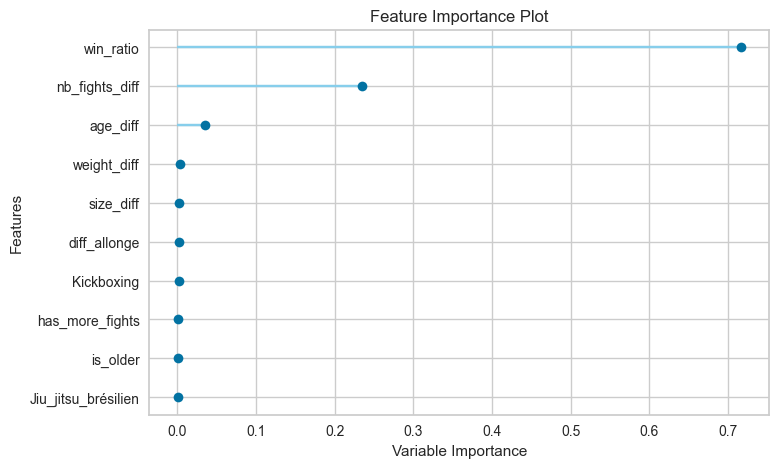

In [598]:
from pycaret.classification import plot_model
plot_model(best_model, plot='feature')

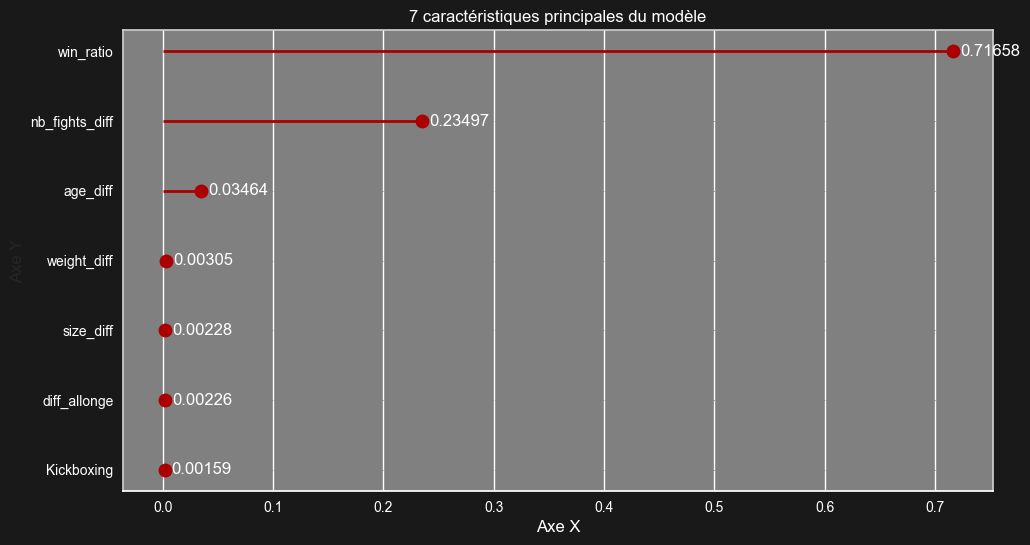

In [698]:
# Obtenez l'importance des caractéristiques du modèle
feature_importance = pd.Series(best_model.feature_importances_, index=best_model.feature_names_in_).sort_values(ascending=True)
top_features = feature_importance.nlargest(7).sort_values(ascending=True)
# Créez un graphique d'importance des caractéristiques avec Matplotlib
fig, ax = plt.subplots(figsize=(13, 8))
# bars = ax.barh(top_features.index, top_features, color='#AB0000')

for i, (feature, importance) in enumerate(top_features.items()):
    ax.hlines(y=i, xmin=0, xmax=importance, color='#AB0000', linewidth=2)
    ax.plot(importance, i, 'o', color='#AB0000', markersize=10)  # Cercle rouge au niveau de la valeur

# Fond gris
fig.patch.set_facecolor('#191919')  # Fond de la figure en gris foncé
ax.set_facecolor('grey')  # Fond de l'axe en gris

for i, importance in enumerate(top_features.values):
    ax.annotate(f'{importance:.5f}', xy=(importance, i), xytext=(5, 0),
                textcoords="offset points", ha='left', va='center', color='white')

# Configuration des axes
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features.index, color='white')  # Noms des caractéristiques en blanc
ax.set_xlabel('Importance', color='white')  # Label de l'axe X en blanc

# Personnalisation des ticks
# ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='x', colors='white')
ax.spines['bottom'].set_color('white')
# ax.spines['left'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.spines['right'].set_color('white')

# # Ajoutez les valeurs à côté des cercles
# for i, importance in enumerate(top_features.values):
#     ax.annotate(f'{importance:.2f}', xy=(importance, i), xytext=(3,0),
#                 textcoords="offset points", ha='left', va='center', color='white')
    

# Activer le quadrillage vertical uniquement
ax.grid(True, axis='x', color='white')
ax.grid(True, axis='y', color='grey', linestyle='--', linewidth=0.5,)


# Personnalisation supplémentaire (titre, labels, etc.)
ax.set_title('Exemple de Graphique', fontsize=10)
ax.set_xlabel('Axe X', fontsize=12)
ax.set_ylabel('Axe Y', fontsize=12)

fig.tight_layout(rect=[0, 0, 0.8, 0.7])  # Ajustement des marges et de la couleur de fond

# Titre avec couleur blanche
plt.title('7 caractéristiques principales du modèle', color='white')

# Sauvegardez le graphique avec le fond et les personnalisations
fig.savefig('feature_importance_lines_with_circles.png', bbox_inches='tight', facecolor=fig.get_facecolor())

# Affichez le graphique
plt.show()


# MODELE DE PREDICTION

## Test & Train

In [398]:
X = df_train_full.drop(columns =['win'],axis=1)
y = df_train_full.win

In [399]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=30)

In [400]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Regression Logistic 

In [401]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

log_model.fit(X_train_scaled, y_train)

test_accuracy = log_model.score(X_test_scaled, y_test)
print(f"Test model has accuracy of {test_accuracy}")

train_accuracy = log_model.score(X_train_scaled, y_train)
print(f"Train model has accuracy of {train_accuracy}")

Test model has accuracy of 0.8123181377303589
Train model has accuracy of 0.8266618146530811


## Accuracy

In [402]:
from sklearn.metrics import accuracy_score

y_pred = log_model.predict(X_test_scaled)

pred_accuracy = accuracy_score(y_test, y_pred)
print(f"Pred model has accuracy of {pred_accuracy}")

Pred model has accuracy of 0.8123181377303589


## Confusion Matrix

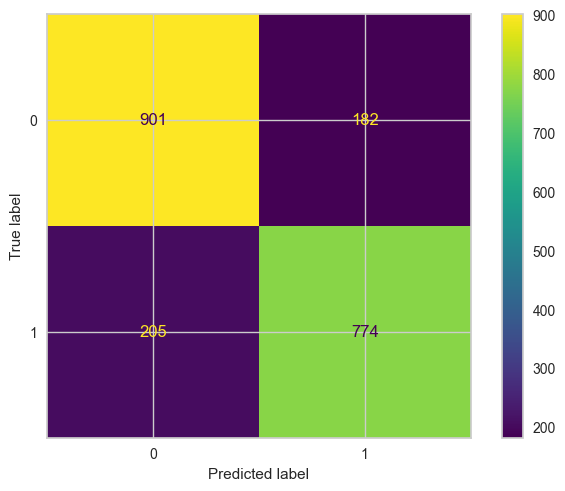

In [403]:
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix = ConfusionMatrixDisplay.from_estimator(log_model, X_test_scaled, y_test)

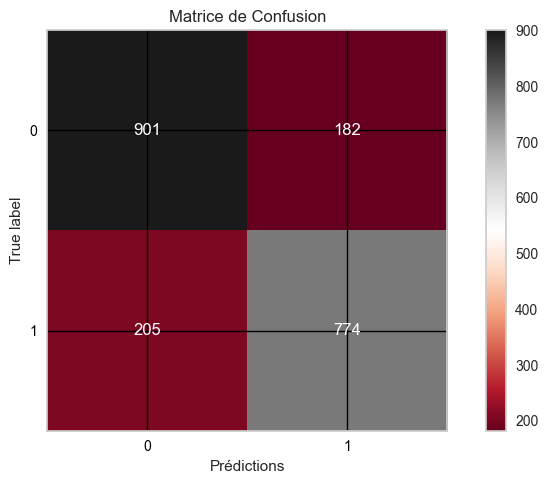

In [583]:
from matplotlib.colors import LinearSegmentedColormap
fig, ax = plt.subplots(figsize=(8, 5))
confusion_matrix.plot(ax=ax, cmap='RdGy')  # Choisissez une colormap, par exemple 'Oranges'

# Personnalisation des labels, des ticks, etc.
ax.set_title('Matrice de Confusion')
ax.set_xlabel('Prédictions')
ax.grid(True, axis='x', color='black')
ax.grid(True, axis='y', color='black')
# Mettre les valeurs des étiquettes en blanc
ax.xaxis.set_tick_params(labelcolor='black')
ax.yaxis.set_tick_params(labelcolor='black')

# Mettre les valeurs en blanc
for text in confusion_matrix.text_.ravel():
    text.set_color('white')
        
plt.tight_layout()
plt.show()

In [263]:
df_predict_full2= df_predict_full.dropna()

In [404]:
df_predict_full

,win,nb_fights_diff,age_diff,weight_diff,win_ratio,diff_allonge,size_diff,is_home_town,Boxe,Hapkido,...,Lutte,Muay_thaï,Sambo,is_taller,is_older,is_heavier,has_more_fights,higher_allonge,is_smaller,Wushu
50,0,2,8,0.00,0.500000,-3.272727,-30.48,0,0,0,...,0,1,0,0,1,0,1,1,1,0
68,0,-3,2,0.46,0.333333,-2.000000,-6.10,0,0,0,...,1,1,0,0,1,1,0,0,1,0
81,0,1,4,0.00,0.333333,6.666667,3.05,0,0,0,...,0,0,0,1,1,0,1,1,0,0
343,0,-1,-1,0.00,0.619048,-5.333333,-27.13,0,1,0,...,1,0,0,0,0,0,0,0,1,0
392,0,7,8,0.00,0.636364,-4.777778,-3.05,0,1,0,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13433,0,-8,-3,0.00,1.000000,0.000000,9.14,0,0,0,...,0,0,0,1,0,0,0,1,0,0
13508,0,-1,2,0.00,0.538462,-3.769231,-12.19,0,0,0,...,0,0,0,0,1,0,0,0,1,0
13599,0,-1,6,0.00,0.000000,6.000000,9.15,0,0,0,...,1,0,0,1,1,0,0,1,0,0
13709,0,-1,4,4.54,0.000000,-10.000000,24.38,0,0,0,...,0,1,0,1,1,1,0,0,0,0


## RECALL

In [405]:
from sklearn.metrics import recall_score

pred_recall = recall_score(y_test, y_pred)

print(f"Pred model has recall of {pred_recall}")

Pred model has recall of 0.7906026557711952


## PREDICT 

In [406]:
X_predict = df_predict_full.drop(columns =['win'],axis=1)

# scale X_predict
X_predict_scaled = scaler.transform(X_predict)

# transform into dataframe for the future
X_predict_scaled = pd.DataFrame(X_predict_scaled, columns=scaler.feature_names_in_)

In [407]:
model_pred = log_model.predict_proba(X_predict_scaled)
pred = pd.DataFrame(model_pred)
pred

,0,1
0,0.709763,0.290237
1,0.953458,0.046542
2,0.889746,0.110254
3,0.461504,0.538496
4,0.215720,0.784280
...,...,...
159,0.166999,0.833001
160,0.638745,0.361255
161,0.996876,0.003124
162,0.994995,0.005005


## Exportation de la table de prédiction des winners

In [408]:
df_predict_ind = df_predict.reset_index()
df_ufc_predict = df_predict_ind.merge(pred, left_index=True, right_index=True)
df_ufc_predict.rename(columns={0:"proba_to_lose",1:"proba_to_win"}, inplace=True)

In [409]:
columns = ['date','fighter','proba_to_lose','proba_to_win']
df_ufc_predict4 = df_ufc_predict[columns]

In [410]:
df_ufc_predict4.to_excel('df_ufc_predict4.xlsx', index=False)

In [617]:
df_technique = df_train_m2.loc[(df_train_m2.date < '2024-06-01') & (df_train_m2.date > '2011-12-31')]
df_technique.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10306 entries, 0 to 13933
Data columns (total 81 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   10306 non-null  datetime64[ns]
 1   is_main_event          10306 non-null  bool          
 2   referee_name           10306 non-null  object        
 3   match                  10306 non-null  int64         
 4   round                  10306 non-null  int64         
 5   fighter                10306 non-null  object        
 6   nb_fights_diff         10306 non-null  int64         
 7   age_diff               10306 non-null  int64         
 8   size_diff              10306 non-null  float64       
 9   weight_diff            10306 non-null  float64       
 10  allonge_diff           10306 non-null  int64         
 11  diff_allonge_jambe     10306 non-null  int64         
 12  is_home_country        10306 non-null  int64         
 13  is_hom

In [644]:
mode = ["Boxe","Wushu","Hapkido",
    "Jiu_jitsu_brésilien",
    "Kickboxing",
    "Lutte",
    "Muay_thaï",
    "Sambo"]
for i in mode: 
    pourcentage=round((df_technique["win"].loc[(df_technique[i]) == 1 & (df_technique["win"]==1)].sum())/(10306/2)*100,2)
    print(f'{i} représente {pourcentage}% de victoire du dataset ')
#     (df_technique["win"].loc[(df_technique["Boxe"]) == 1 & (df_technique["win"]==1)].sum())/(10306/2)

Boxe représente 29.07% de victoire du dataset 
Wushu représente 0.37% de victoire du dataset 
Hapkido représente 0.54% de victoire du dataset 
Jiu_jitsu_brésilien représente 63.3% de victoire du dataset 
Kickboxing représente 33.22% de victoire du dataset 
Lutte représente 39.45% de victoire du dataset 
Muay_thaï représente 14.79% de victoire du dataset 
Sambo représente 3.65% de victoire du dataset 


# Calcul taux de victoire par style de combats

In [656]:
mode = ["Boxe","Wushu","Hapkido",
    "Jiu_jitsu_brésilien",
    "Kickboxing",
    "Lutte",
    "Muay_thaï",
    "Sambo"]
mode_percent= []
for i in mode: 
    pourcentage=round((df_technique["win"].loc[(df_technique[i]) == 1 & (df_technique["win"]==1)].sum())/(10306/2)*100,2)
    mode_percent.append([i, pourcentage])
#     print(f'{i} représente {pourcentage}% de victoire du dataset ')
df_mode_percent = pd.DataFrame(mode_percent)

In [667]:
df_mode_percent.rename(columns={0:"Mode", 1:"%Victoire"}, inplace=True)

In [679]:
df_mode_percent= df_mode_percent.sort_values("%Victoire", ascending=0)

In [695]:
fig =px.bar(df_mode_percent, x="Mode", y="%Victoire", text='%Victoire')
fig.update_layout(showlegend=False,
                  plot_bgcolor='#191919',
                  paper_bgcolor='black',
                  font=dict(color='white'),title='Pourcentage de Victoire par technique de combat')
fig.update_traces(marker_color='#AB0000')

fig.show()

In [633]:
(df_technique["Boxe"] == 1).sum()

2736

In [636]:
(df_technique["Boxe"] == 0).sum()

7570

In [627]:
len(df_technique)

10306